# Artificial Neurons (Rosenblatt's Perceptron)

The idea of a neuron is that multiple signals arrive at the dendrites, which are then processed by the cell, and if a signal threshold is crossed, information is passed along the axon. 

The artificial version (the perceptron) works in much a similar way. Given a vector of input values $x_{i}$, and weights $w_{i}$ it's possible to create a vector of net inputs: $z = [w_{1}x_{1}+...+w_{m}x_{m}]$ which can then be fed into a step function which emits only if $z$ is above some threshold $\theta$:

$$\phi(z) = \Bigg \{ \begin{array}{c} 1 \; \textrm{if} \; z \geq \theta \\ -1 \; otherwise \end{array}$$

This can be simplified by adding $w_{0} = - \theta, x_{0} = 1$ to $z$, so the new formula becomes:

$$\phi(z) = \Bigg \{ \begin{array}{c} 1 \; \textrm{if} \; z \geq 0 \\ -1 \; \textrm{otherwise} \end{array}$$

To use such a perceptron, weights should be initialised to 0 or small random numbers, then each sample $x_{i}$ should compute $\hat{y}$ and update weights via the following formula:

$$\Delta w_{j} = \eta(y^{i} - \hat{y}^{i})x^{i}_{j} \; : \eta \; \textrm{is} \; \textrm{the} \; \textrm{learning} \; \textrm{rate} $$

It is important to note that this only works if the two classes are linary seperable. 

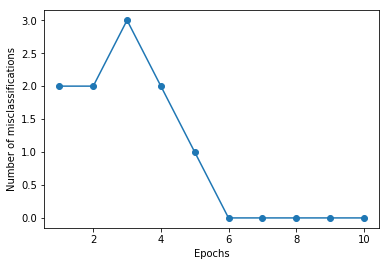

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training set.
        
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
        
    """
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_featurees is the number of features.
        y : array-like, shape = [n_sammples]
            Target values.
            
        Returns 
        -------
        self : Object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range (self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] # Dot product + initial
        """ Alternate implementation:
        sum([i*j for i,j in zip(X, self.w_[1:])])        
        """
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values # Get first 100 samples for training.
y = np.where(y == 'Iris-setosa', -1, 1) # One vs. All classification
X = df.iloc[0:100, [0,2]].values 

ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

X_test = df.iloc[100:, [0,2]].values
result = ppn.predict(X_test)
# The perception correctly predicts that none of the later data points are Iris-setosa (1)
print(result) 
print(df[100:][4].values)

# Adaptive Linear Convergence

To improve on the perceptron, weights can be updated based on a linear activation function. Once this has been done, a quantizer (which is a type of step function), can be used to predict class labels. 

The linear activation function is an objective function that is minimised during the learning process. One good example of this is the Sum of Squared Errors (SSE):

$$ J(\mathbf{w}) = \frac{1}{2} \sum_{i} \Big (y^{i} - \phi  \Big (z^{i} \Big ) \Big )^2 $$

With this function, we can use gradient decent to move to the convex minimum. Each step reduces $J(w)$ towards some $J_{min}(w)$.


This method has an additional property where it benefits from data being in a standard normal distribution, which can be done using the following formula:

$$ \mathbf{x}^{'}_{j} = \frac{\mathbf{x}_{j} - \mu_{j}}{\sigma_{j}} $$

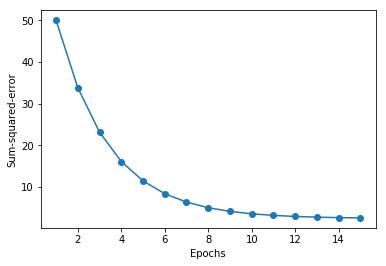

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class AdalineGD(object):
    """ADAptive LInear Neuron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training set.
        
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
        
    """
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_featurees is the number of features.
        y : array-like, shape = [n_sammples]
            Target values.
            
        Returns 
        -------
        self : Object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range (self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] # Dot product + initial
        """ Alternate implementation:
        sum([i*j for i,j in zip(X, self.w_[1:])])  
        """
        
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values # Get first 100 samples for training.
y = np.where(y == 'Iris-setosa', -1, 1) # One vs. All classification
X = df.iloc[0:100, [0,2]].values 

X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std,y)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

X_test = df.iloc[100:, [0,2]].values
result = ada.predict(X_test)
# The perception correctly predicts that none of the later data points are Iris-setosa (1)
print(result) 
print(df[100:][4].values)

# Stochastic Gradient Descent

Previously, gradient descent was done on the entire training set. However, with much larger data sets, this becomes cost prohibitive. 

In stochastic gradient descent, weights up updated for each individual sample. While this produces more noise, due to the more frequent updates, convergence can happen much faster:

$$ \Delta \mathbf{w} = \eta \Big ( y^{i} - \phi(z^{i}) \Big ) \mathbf{x}^{i} $$

It's also possible to have an adapative learning rate that decreases over time, so as convergence is approached, jumps get smaller. 

Because of the addition of random movement, it's also possible to handle local minima better than normal gradient decent.

Samples should be shuffled each epoch to avoid cycles. 

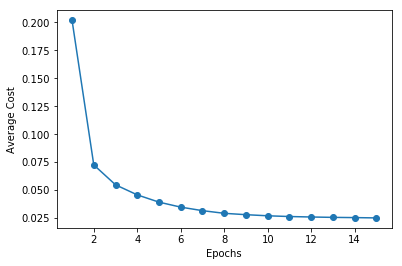

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class AdalineSGD(object):
    """ADAptive LInear Neuron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training set.
        
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (Default: True)
        Shuffles data every epoch
        if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling 
        and initializing weights.
        
    """
    def __init__(self, eta = 0.01, n_iter = 10,
                shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            np.random.seed(random_state)
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_featurees is the number of features.
        y : array-like, shape = [n_sammples]
            Target values.
            
        Returns 
        -------
        self : Object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitalizing the weights"""
        if not self.w_initialized:
            self.initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Applu Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] # Dot product + initial
        """ Alternate implementation:
        sum([i*j for i,j in zip(X, self.w_[1:])])  
        """
        
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values # Get first 100 samples for training.
y = np.where(y == 'Iris-setosa', -1, 1) # One vs. All classification
X = df.iloc[0:100, [0,2]].values 

X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada = AdalineSGD(n_iter=15, eta=0.01, random_state = 1)
ada.fit(X_std,y)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

X_test = df.iloc[100:, [0,2]].values
result = ada.predict(X_test)
# The perception correctly predicts that none of the later data points are Iris-setosa (1)
print(result) 
print(df[100:][4].values)